## Análise de dados: Y.Afisha

- Data: 28/09/2025
- Caroline Beatriz Scheurich
- Objetivo: Otimizar despesas com marketing

## Etapa 1 - Inicialização e Carregamento dos dados

Para iniciar vamos:

- Carregar as bibliotecas
- Carregar os bancos de dados
- Ler as informações dos arquivos

In [1]:
#Carregando as bibliotecas
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando e vizualizando o banco de dados:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
display(visits.head())
print(visits.info())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [4]:
display(orders.head())
print(orders.info())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [5]:
display(costs.head())
print(costs.info())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


Ajustando dados:

* Os dfs estão completos, sem valores ausentes.

* Vamos colocar os nomes das colunas todas em minúsculo.

* Tipos de dados:
    - Em 'visits':
        - Alterar Device para category
        - Alterar End Ts e Start Ts para Datetime
    - Em 'orders':
        - Alterar Buy Ts para Datetime
    - Em 'costs':
        - Alterar dt para Datetime

In [6]:
# Ajustes dados df visits:
visits.columns = visits.columns.str.strip().str.lower().str.replace(' ', '_')
visits['device'] = visits['device'].astype('category')
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M:%S")
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M:%S")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [7]:
# Ajustando dados df orders:
orders.columns = orders.columns.str.strip().str.lower().str.replace(' ', '_')
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [8]:
# Ajustando dados df costs:
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d %H:%M:%S")
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## Etapa 2 - Analise de dados

Nesta etapa vamos iniciar a analise de dados e verificar como os dados se relacionam:

**1) Produto:**
- Quantas pessoas usam-no cada dia, semana e mês?
- Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).
- Que comprimento tem cada sessão?
- Com que frequência os usuários voltam?

**2) Vendas:**
- Quando as pessoas começam a comprar? (tempo entre o registro e a conversão)
- Quantos pedidos os clientes fazem durante um determinado período de tempo?
- Qual é o volume médio de uma compra?
- Quanto dinheiro eles trazem para a empresa (LTV)?

**3) Marketing:**


- Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo
- Quanto custou a aquisição de clientes para cada origem?
- Os investimentos valeram a pena? (ROI)




**Análise Produtos**

Text(0.5, 1.0, 'Visitas por mês')

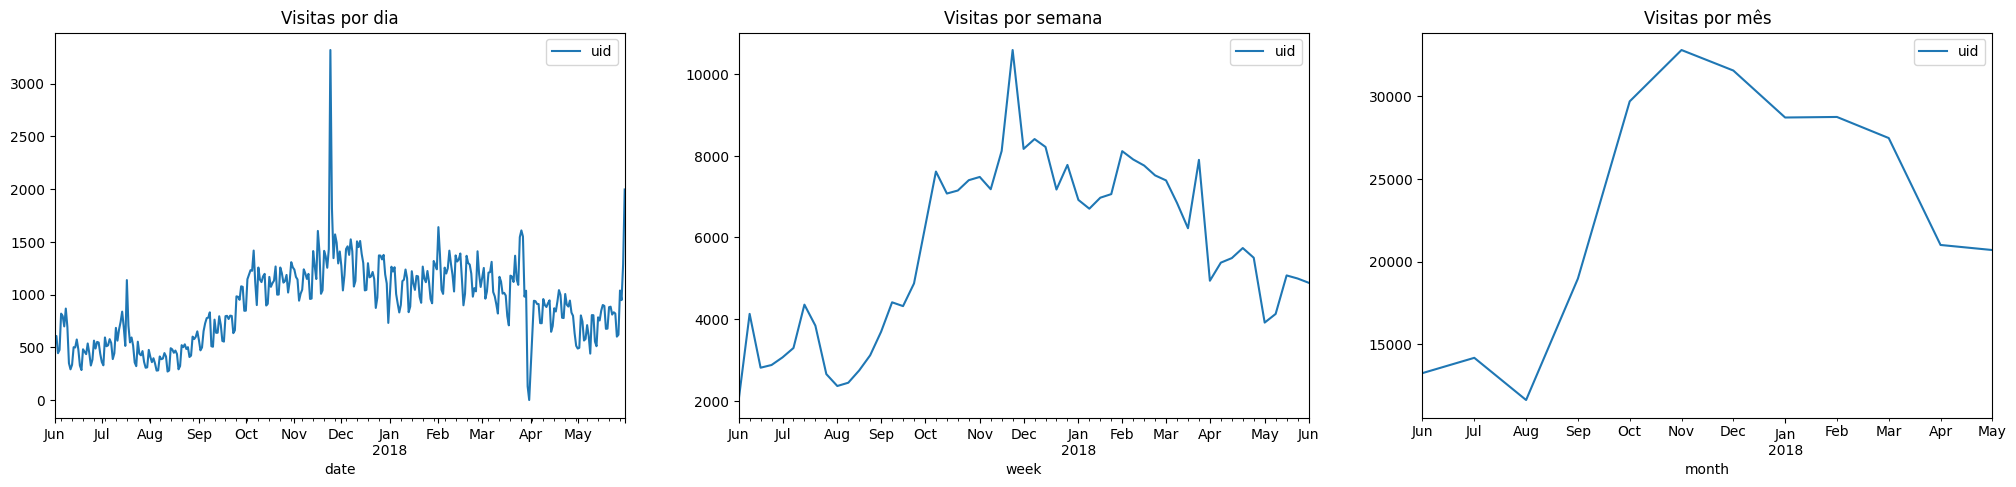

In [9]:
# Análises de Produto:

#Quantas pessoas usam-no cada dia, semana e mês?
visits['date'] = visits['start_ts'].dt.to_period('D')
visits['week'] = visits['start_ts'].dt.to_period('W')
visits['month'] = visits['start_ts'].dt.to_period('M')

fig, ax = plt.subplots(1, 3, figsize = (25,5))

daily = visits.groupby('date').agg({'uid' : 'nunique'})
daily.plot(ax = ax[0])
ax[0].set_title('Visitas por dia')

weekly = visits.groupby('week').agg({'uid' : 'nunique'})
weekly.plot(ax = ax[1])
ax[1].set_title('Visitas por semana')

monthly = visits.groupby('month').agg({'uid' : 'nunique'})
monthly.plot(ax = ax[2])
ax[2].set_title('Visitas por mês')

Com os dados acima podemos perceber o pico de vendas em novembro/dezembro, o que nos mostra um crescimento sazonal, provavelmente ligado a eventos como Black Friday e Natal, um padrão que pode se repetir anualmente.

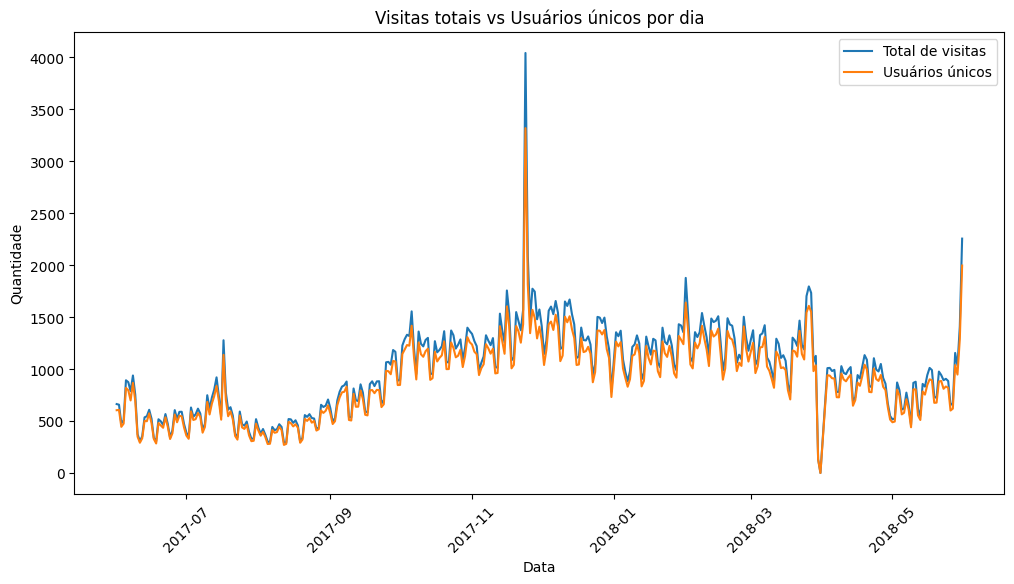

In [10]:
# Quantas sessões ocorrem por dia?

sessions_day_count = visits.groupby(visits['start_ts'].dt.date)['uid'].count()
sessions_day_nunique = visits.groupby(visits['start_ts'].dt.date)['uid'].nunique()

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(sessions_day_count.index, sessions_day_count.values, label="Total de visitas")
ax.plot(sessions_day_nunique.index, sessions_day_nunique.values, label="Usuários únicos")
ax.set_title("Visitas totais vs Usuários únicos por dia")
ax.set_xlabel("Data")
ax.set_ylabel("Quantidade")
ax.legend()
plt.xticks(rotation=45)
plt.show()

No gráfico acima temos o comparativo entre o total de visitas e os usuários únicos, as duas curvas são muito próximas o que nos indica que a maior parte dos usuários acessa o site uma única vez por dia (poucos entram várias vezes ao dia).

In [11]:
# Quanto tempo dura cada sessão?
visits['duration_minutes'] = (visits['end_ts'] - visits['start_ts']).dt.seconds / 60
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,duration_minutes
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25/2017-12-31,2017-12,0.0


<AxesSubplot:>

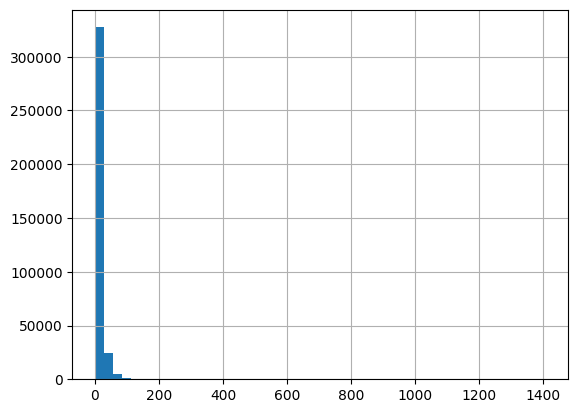

In [12]:
visits['duration_minutes'].hist(bins=50)

In [13]:
visits['duration_minutes'].describe()

count    359400.000000
mean         10.725108
std          16.938913
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: duration_minutes, dtype: float64

Com os dados acima podemos perceber que muitas visitas tem uma duração muito curta e poucas com duração mais alta, o tempo médio da visita é de 11 minutos.

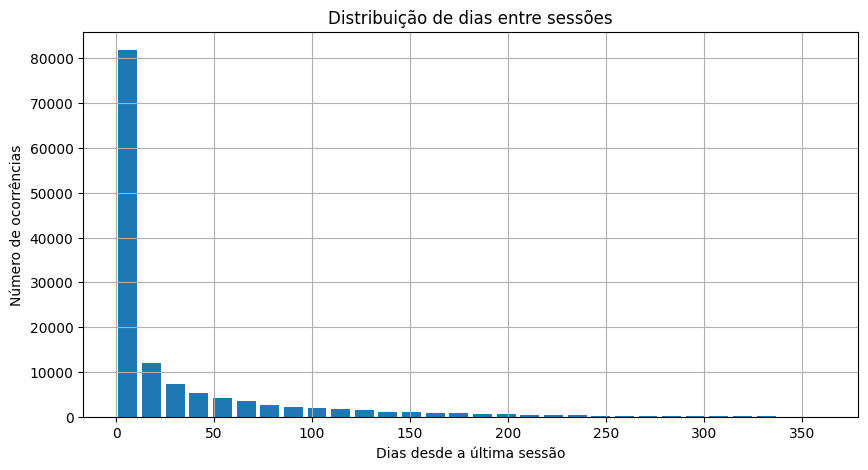

In [14]:
# Com que frequência os usuários voltam?
visits_sorted = visits.sort_values(['uid', 'start_ts'])
visits_sorted['prev_session'] = visits_sorted.groupby('uid')['start_ts'].shift()
visits_sorted['days_between_sessions'] = (visits_sorted['start_ts'] - visits_sorted['prev_session']).dt.days

plt.figure(figsize=(10,5))
visits_sorted['days_between_sessions'].dropna().plot(kind='hist', bins=30, rwidth=0.8)
plt.title("Distribuição de dias entre sessões")
plt.xlabel("Dias desde a última sessão")
plt.ylabel("Número de ocorrências")
plt.grid(True)
plt.show()

No gráfico acima temos a distribuição dde dias entre sessões dos usuários e podemos perceber que a maioria retorna rapidamente, porém a retenção de longo prazo é baixa e possuem usuários ocasionais, que retornam muito tempo depois da primeira visita.

In [15]:
# Primeiro acesso de cada usuário
first_visit = visits.groupby('uid').agg({'month' : 'min'}).reset_index().rename(columns = {'month' : 'first_month'})
visits_with_first_visit = visits.merge(first_visit, on = 'uid', how = 'left')

# Diferença entre visitas (mês)
visits_with_first_visit['month_diff'] = visits_with_first_visit['month'].astype(int) - visits_with_first_visit['first_month'].astype(int)

In [16]:
# Tabela de retenção:
retencion_table = visits_with_first_visit.pivot_table(index = 'first_month', columns = 'month_diff', values = 'uid', aggfunc = 'nunique').fillna('')
retencion_table

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02,22197.0,1267.0,565.0,446.0,,,,,,,,


In [17]:
# Convertendo para float:
numeric_cols = retencion_table.columns[1:]
retencion_table[numeric_cols] = retencion_table[numeric_cols].replace('', np.nan)
retencion_table[numeric_cols] = retencion_table[numeric_cols].astype(float)

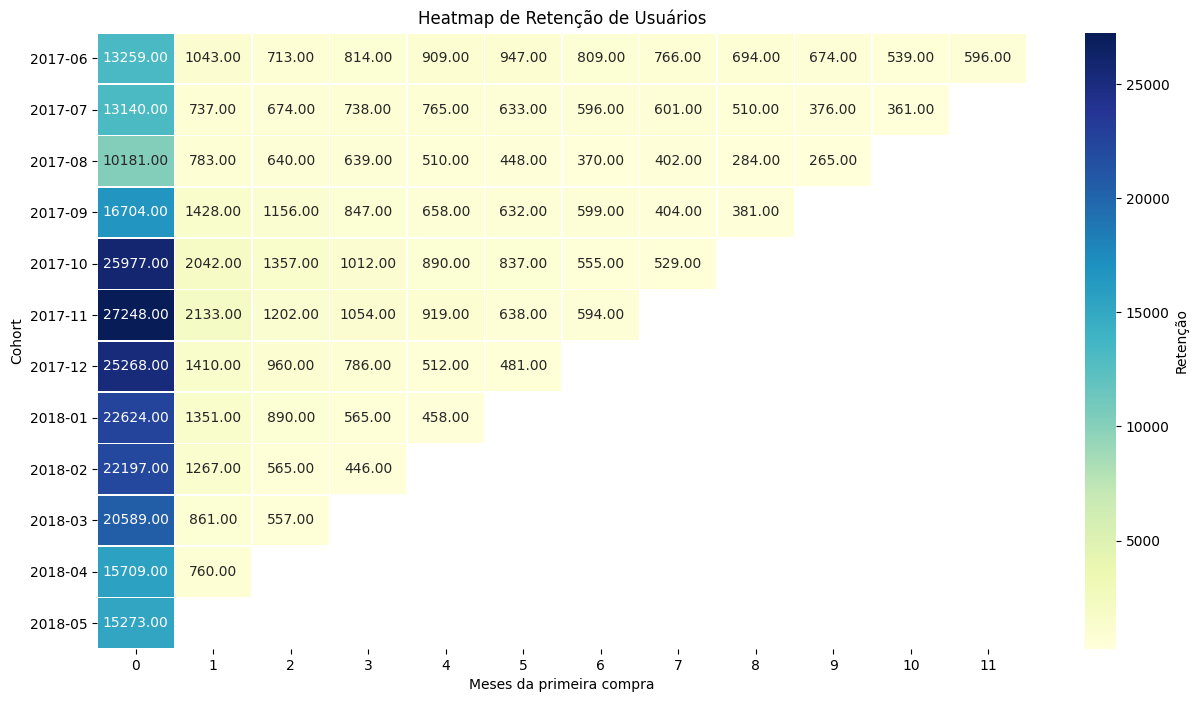

In [18]:
# Plotando Heatmap:
plt.figure(figsize=(15,8))
sns.heatmap(retencion_table, 
            annot=True,       # mostra os números nas células
            fmt=".2f",        # duas casas decimais
            cmap="YlGnBu",    # paleta de cores
            linewidths=0.5,   # linhas entre células
            cbar_kws={'label': 'Retenção'})

plt.title("Heatmap de Retenção de Usuários")
plt.xlabel("Meses da primeira compra")
plt.ylabel("Cohort")
plt.show()

In [19]:
# Transformando em percentual:
retencion_rates = retencion_table.copy()
retencion_rates2 = retencion_rates.copy()

for col in retencion_rates.columns[1:]:
    retencion_rates2[col] = retencion_rates2[col].where(retencion_rates2[col].notna(), np.nan) / retencion_rates2.iloc[:,0] * 100
retencion_rates2.iloc[:,0] = 100

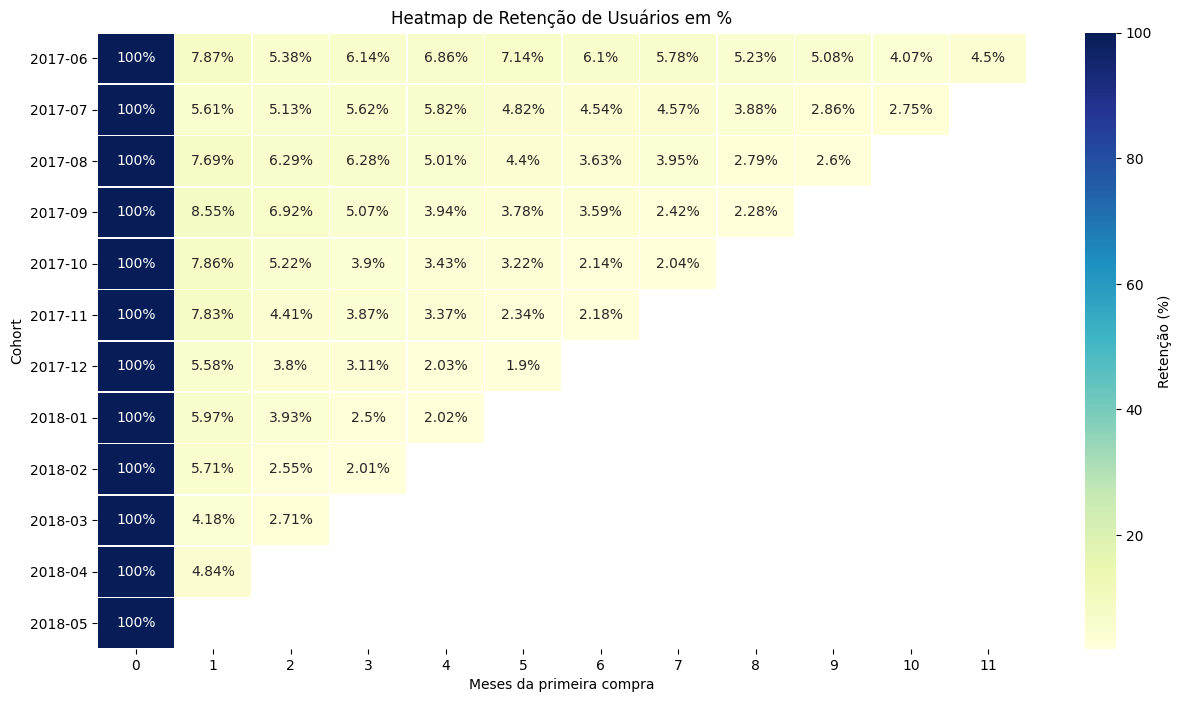

In [20]:
# Plotando gráfico com dados em percentual:
plt.figure(figsize=(15,8))
annot_labels = retencion_rates2.round(2).astype(str) + '%'
sns.heatmap(retencion_rates2, 
            annot=annot_labels,   
            fmt="",               
            cmap="YlGnBu",
            linewidths=0.5,
            cbar_kws={'label': 'Retenção (%)'})

plt.title("Heatmap de Retenção de Usuários em %")
plt.xlabel("Meses da primeira compra")
plt.ylabel("Cohort")
plt.show()

Com o gráfico heatmap de retenção de usuários por cohort acima podemos perceber:
- Alta queda após o primeiro mês, ou seja, a maioria dos usuários faz apenas a primeira compra e não retorna tão cedo.
- Com o passar dos meses a retenção segue caindo, o que reforça que os clientes recorrentes são raros.

**Análise Vendas**

In [21]:
# Quando as pessoas começam a comprar? (tempo entre o registro e a conversão)

# Primeiro acesso de cada usuário
first_visits = visits.groupby('uid').agg(first_visit=('start_ts', 'min'), device=('device', 'first')).reset_index()
first_visits.rename(columns={'start_ts': 'first_visit'}, inplace=True)

# Primeira compra de cada usuário
first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.rename(columns={'buy_ts': 'first_order'}, inplace=True)

# Juntando:
conversion = first_visits.merge(first_orders, on='uid', how='inner')
conversion['days_to_convert'] = (conversion['first_order'] - conversion['first_visit']).dt.days

# Por 'device':
conversion_distribution = conversion.groupby(['device', 'days_to_convert'])['uid'].count().unstack().fillna(0)

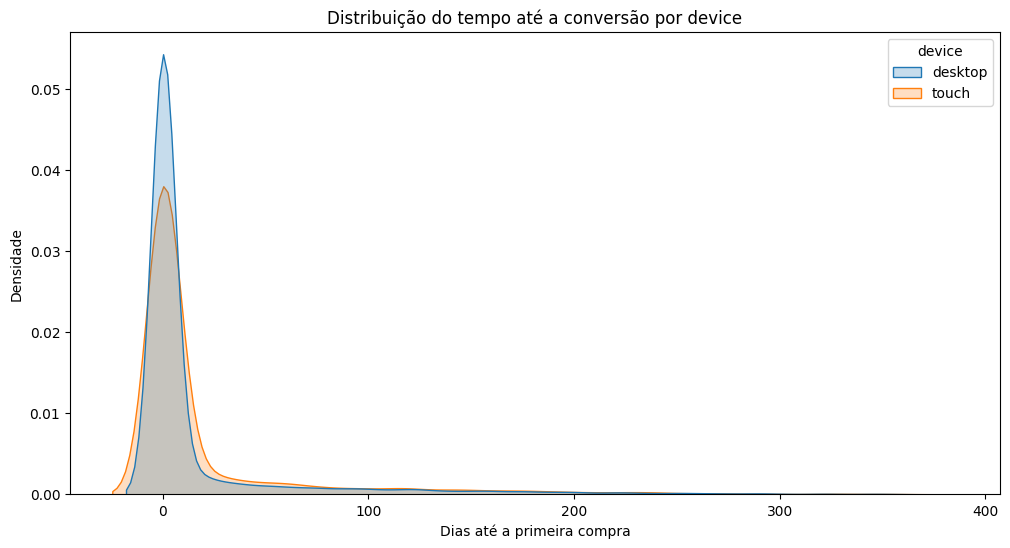

In [22]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=conversion, x="days_to_convert", hue="device", fill=True, common_norm=False)
plt.title("Distribuição do tempo até a conversão por device")
plt.xlabel("Dias até a primeira compra")
plt.ylabel("Densidade")
plt.show()

Com o gráfico da distribuição do tempo até a conversão (primeira compra), podemos perceber que o desktop converte um pouco mais rápido, porém as curvas possuem formas muito semelhantes, ou seja, o padrão de comportamento não sofre grande alteração entre deskop e touch. Novamente vemos que o pico ocorre entre 0 e 10 dias, isso mostra que se o usuário não comprar logo no ínicio, a probabilidade de conversão cai drasticamente.

Text(0.5, 1.0, 'Pedidos por mês')

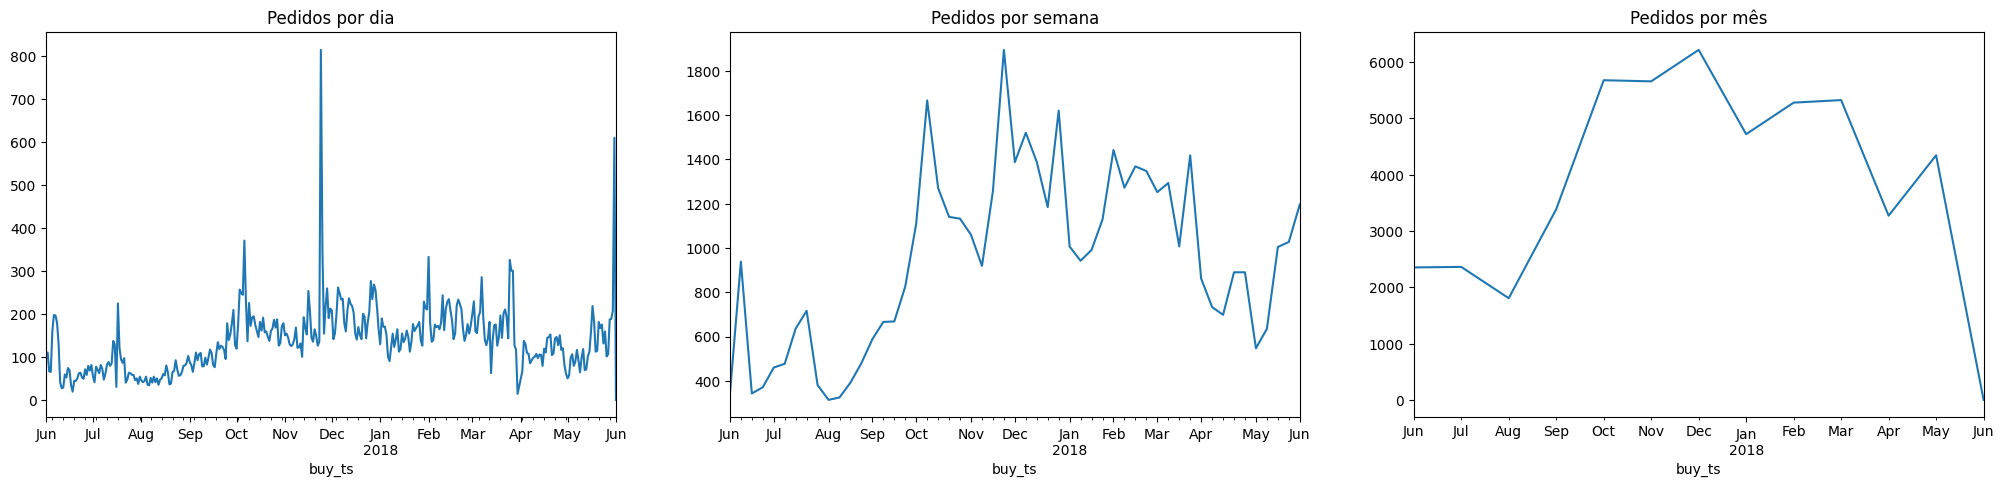

In [23]:
# Quantos pedidos os clientes fazem durante um determinado período de tempo?

fig, ax = plt.subplots(1, 3, figsize = (25,5))
orders_per_day = orders.groupby(orders['buy_ts'].dt.to_period('D'))['uid'].count()
orders_per_day.plot(ax = ax[0])
ax[0].set_title('Pedidos por dia')

orders_per_week = orders.groupby(orders['buy_ts'].dt.to_period('W'))['uid'].count()
orders_per_week.plot(ax = ax[1])
ax[1].set_title('Pedidos por semana')

orders_per_month = orders.groupby(orders['buy_ts'].dt.to_period('M'))['uid'].count()
orders_per_month.plot(ax = ax[2])
ax[2].set_title('Pedidos por mês')

In [24]:
# Juntar visitas e pedidos
first_visits_orders = first_visits.merge(orders, on='uid')

# Mês do pedido
first_visits_orders['month'] = first_visits_orders['buy_ts'].dt.to_period('M')

# Mês da primeira visita
first_visits_orders['first_month'] = first_visits_orders['first_visit'].dt.to_period('M')

# Diferença em meses
first_visits_orders['month_diff'] = (first_visits_orders['month'].astype(int) - first_visits_orders['first_month'].astype(int))

In [25]:
# Receita e Retenção de vendas:
orders_by_user_month = first_visits_orders.groupby(['uid', 'month', 'first_month', 'month_diff'])['revenue'].sum().reset_index()
orders_by_user_month.pivot_table(index = 'first_month', columns = 'month_diff', values = 'revenue', aggfunc = 'sum').fillna('')

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,9557.49,2664.58,1464.69,3882.09,3940.59,2824.48,3489.95,2270.81,2317.91,3481.64,2204.01,1927.81
2017-07,9874.89,1059.28,1108.9,982.96,846.99,798.08,588.0,770.3,724.52,591.03,467.16,
2017-08,6234.81,997.32,1001.35,946.21,810.04,532.9,486.65,1246.23,830.64,375.72,,
2017-09,12357.20,3700.48,2110.63,10438.93,1288.48,1910.05,966.84,491.38,418.57,,,
2017-10,18362.32,3809.83,1327.02,1058.05,1043.47,1022.19,578.91,655.9,,,,
2017-11,16531.79,2667.58,1342.85,1369.53,1108.74,707.63,698.6,,,,,
2017-12,16857.00,1739.03,4198.3,5123.82,1457.57,1782.13,,,,,,
2018-01,10597.01,1951.70,1164.76,305.88,527.47,,,,,,,
2018-02,11512.63,1984.46,663.19,901.01,,,,,,,,


Os dados acima reforçam o que vimos no heatmap das visitas:
- Alta receita no primeiro mês, queda acentuada nos meses seguintes.
- Maior parte da receita vem da primeira compra e não de recompras.
- O valor médio de aquisição inicial varia bastante (sazonalidade)

In [26]:
# Qual é o volume médio de uma compra?
media_compras = orders['revenue'].mean()
print(f'O volume médio de uma compra é {media_compras:.2f}')

O volume médio de uma compra é 5.00


In [27]:

# Quanto dinheiro eles trazem para a empresa (LTV)?

cohort_sizes = first_visits_orders.groupby('first_month')['uid'].nunique().reset_index().rename(columns = {'uid' : 'n_buyers'})
df_ltv = pd.merge(left = first_visits_orders, right = cohort_sizes, on = 'first_month')

df_ltv['LTV'] = df_ltv['revenue'] / df_ltv['n_buyers']

df_ltv.pivot_table(index = 'first_month', columns = 'month_diff', values = 'LTV', aggfunc= 'sum').cumsum(axis=1)


month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,3.269754,4.181345,4.682436,6.010554,7.358686,8.324981,9.518943,10.295819,11.088809,12.279928,13.033951,13.693483
2017-07,4.017449,4.448401,4.899540,5.299443,5.644028,5.968714,6.207933,6.521318,6.816078,7.056530,7.246587,NaN
2017-08,3.622783,4.202284,4.784126,5.333928,5.804608,6.114253,6.397025,7.121156,7.603806,7.822121,NaN,NaN
2017-09,4.040942,5.251040,5.941239,9.354886,9.776233,10.400840,10.717008,10.877695,11.014572,NaN,NaN,NaN
2017-10,3.925250,4.739664,5.023337,5.249513,5.472572,5.691082,5.814833,5.955043,NaN,NaN,NaN,NaN
2017-11,3.878881,4.504779,4.819855,5.141190,5.401335,5.567367,5.731281,NaN,NaN,NaN,NaN,NaN
2017-12,4.137703,4.564563,5.595074,6.852761,7.210535,7.647975,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,3.397567,4.023312,4.396752,4.494822,4.663937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,3.613506,4.236375,4.444532,4.727335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Temos um crescimento consistente do LTV ao longo dos meses, ou seja, o valor de um cliente aumenta com o tempo conforme ele continua consumindo. Reforçando mais uma vez a necessidade de fidelização do cliente.

**Análise Marketing**

In [28]:
# Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo

# Total gasto:
total_spent = costs['costs'].sum()

# Gasto por origem (source_id)
spent_by_source = costs.groupby('source_id')['costs'].sum()

# Gasto ao longo do tempo (por dia ou mês)
spent_over_time = costs.groupby(costs['dt'].dt.to_period('M'))['costs'].sum()

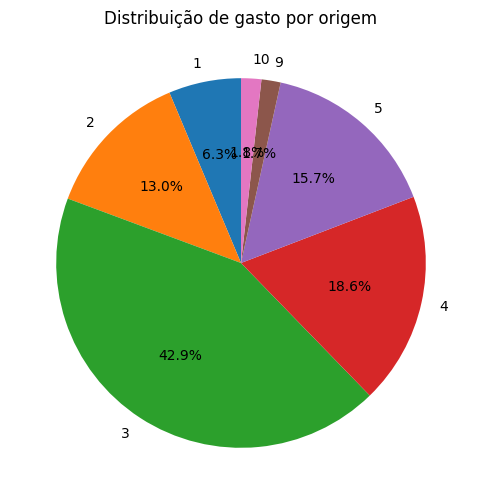

In [29]:
# Gráfico gasto por origem:
spent_by_source.plot(kind='pie', figsize=(6,6), autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title("Distribuição de gasto por origem")
plt.show()

No gráfico acima temos a distribuição de gasto por origem, as campanhas com maiores investimentos foram: 3, 4, 5 e 2 (nesta ordem).

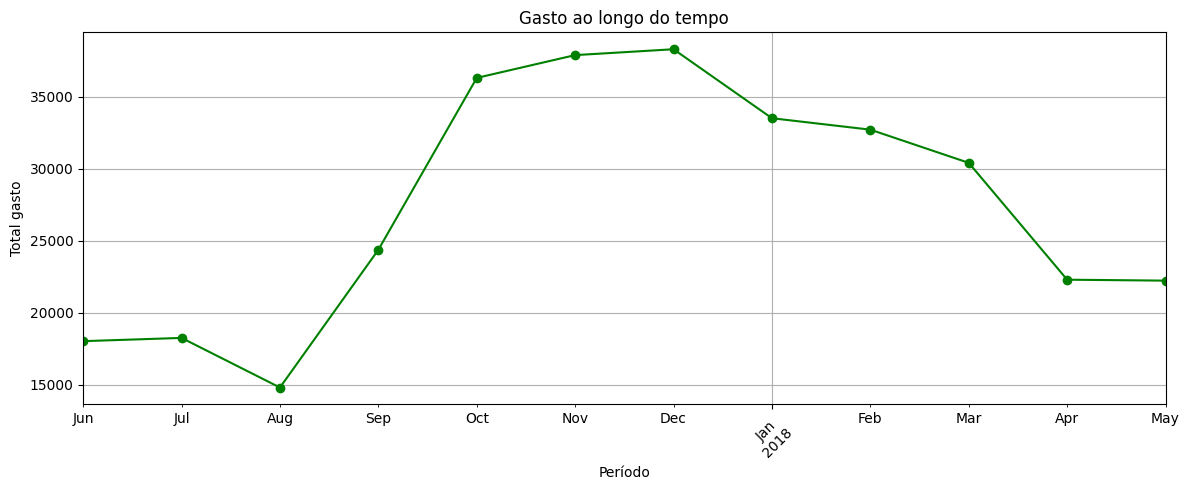

In [30]:
# Gráfico gasto ao longo do tempo:
spent_over_time.plot(figsize=(12,5), marker='o', color='green')
plt.title("Gasto ao longo do tempo")
plt.xlabel("Período")
plt.ylabel("Total gasto")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

No gráfico acima podemos analisar o gasto com as campanhas ao longo do tempo. Podemos perceber que o gráfico tem certa semelhança com o gráfico de vendas mensais. O pico de investimento também é o pico de vendas.

In [31]:
# Quanto custou a aquisição de clientes para cada origem?
# Primeiro acesso de cada usuário e sua origem
first_visits = visits.groupby('uid').first().reset_index()[['uid','source_id']]

# Usuários que compraram
buyers = orders['uid'].unique()

# Clientes adquiridos por origem
clients_by_source = first_visits[first_visits['uid'].isin(buyers)].groupby('source_id')['uid'].nunique()

# CAC = gastos / clientes adquiridos
cac = (spent_by_source / clients_by_source).dropna()

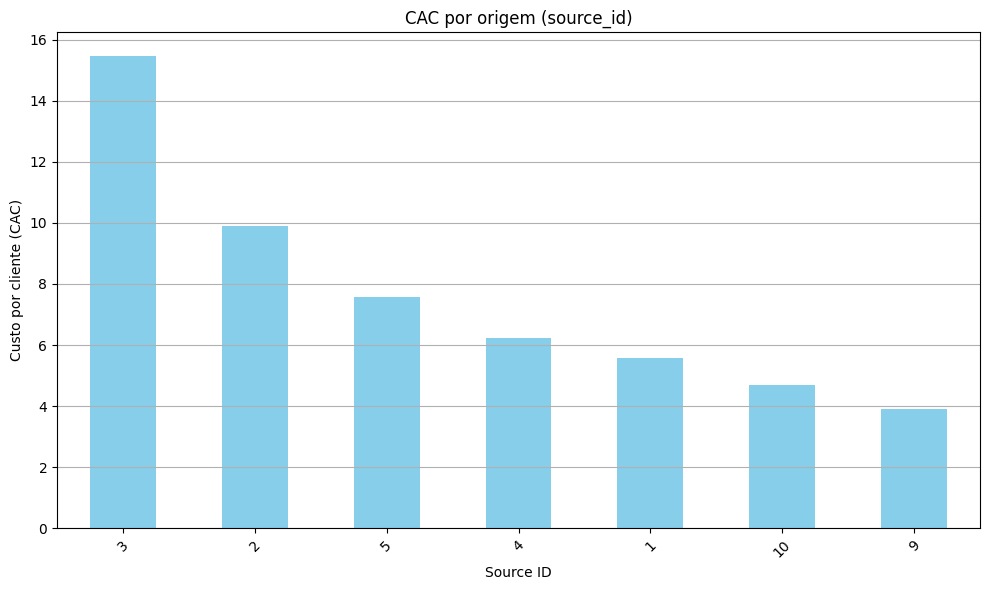

In [32]:
cac.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title("CAC por origem (source_id)")
plt.xlabel("Source ID")
plt.ylabel("Custo por cliente (CAC)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [33]:
# Os investimentos valeram a pena? (ROI)
# Juntar primeira origem com pedidos
orders_with_source = orders.merge(first_visits, on='uid', how='left')

# Receita por origem
revenue_by_source = orders_with_source.groupby('source_id')['revenue'].sum()

# ROI
roi = ((revenue_by_source - spent_by_source) / spent_by_source).dropna()

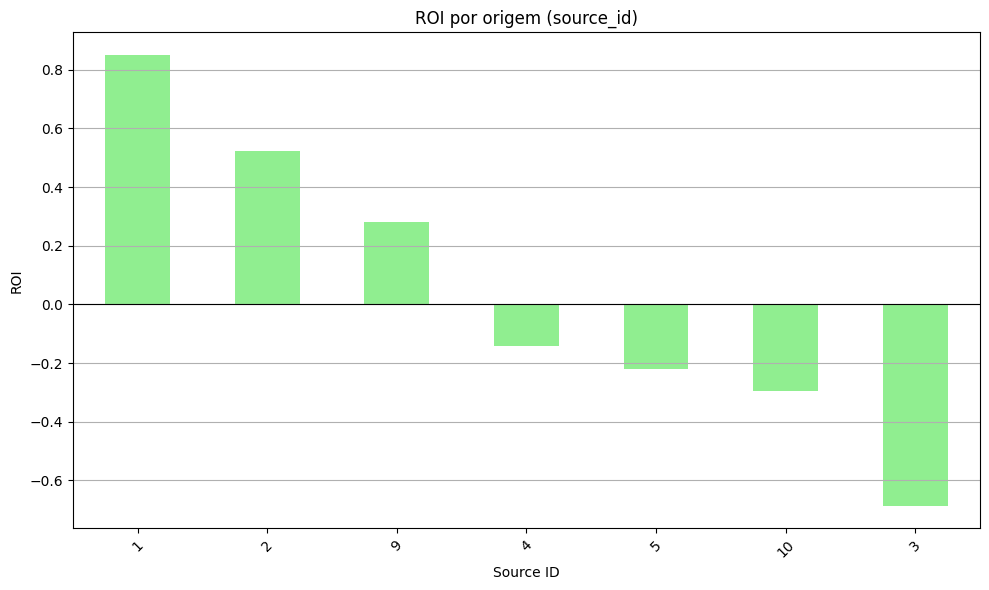

In [34]:
roi.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), color='lightgreen')
plt.title("ROI por origem (source_id)")
plt.xlabel("Source ID")
plt.ylabel("ROI")
plt.axhline(0, color='black', linewidth=0.8)  # linha de ROI zero
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Ao analisar o retorno sobre o investimento conseguimos visualizar quais campanhas estão trazendo resultado e quais precisam ser reavaliadas imediatamente.

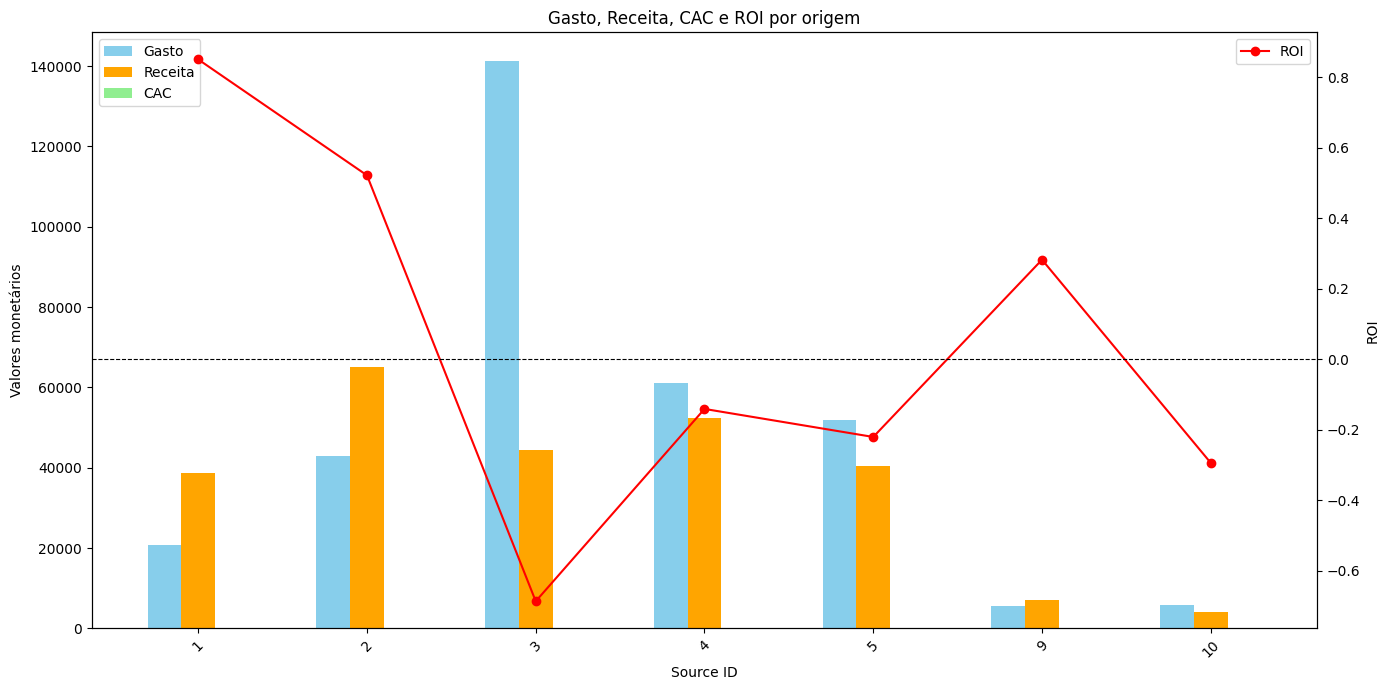

In [35]:
# Criar um DataFrame consolidado
summary = pd.DataFrame({
    'Gasto': spent_by_source,
    'Receita': revenue_by_source,
    'CAC': cac,
    'ROI': roi
}).dropna()

sources = summary.index
x = np.arange(len(sources))  # posições para barras
width = 0.2  # largura das barras

fig, ax1 = plt.subplots(figsize=(14,7))

# Barras: Gasto, Receita e CAC
bar1 = ax1.bar(x - width, summary['Gasto'], width, label='Gasto', color='skyblue')
bar2 = ax1.bar(x, summary['Receita'], width, label='Receita', color='orange')
bar3 = ax1.bar(x + width, summary['CAC'], width, label='CAC', color='lightgreen')

ax1.set_xlabel('Source ID')
ax1.set_ylabel('Valores monetários')
ax1.set_title('Gasto, Receita, CAC e ROI por origem')
ax1.set_xticks(x)
ax1.set_xticklabels(sources, rotation=45)
ax1.legend(loc='upper left')

# Linha: ROI
ax2 = ax1.twinx()
ax2.plot(x, summary['ROI'], color='red', marker='o', label='ROI')
ax2.set_ylabel('ROI')
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

Através dos gráficos acima podemos concluir:
- Source 3 tem o maior gasto e o pior ROI, isso indica ineficiência total nessa origem, usando muito recurso com baixissimo retorno.
- Source 1 e 2 têm ROI positivo, possuem baixo gasto e receita considerável.
- Source 4 e 5 têm gastos e receitas equilibrados
- Source 9 têm gasto e receita baixos porém ROI positivo, pode ser uma origem a ser explorada mais.
- Source 10 possui gastos e receitas baixo, baixo impacto.

## Etapa 3 - Conclusão geral


### Após a análise dos dados, podemos concluir e sugerir:

- Aproveitar o pico de novembro/dezembro com campanhas mais fortes de aquisição e conversão.
- Criar ações de fidelização e para melhorar a retenção logo após a primeira compra (newsletter, notificações, promoções para retorno, desconto na segunda compra).
- Investir em estratégias para aumentar a recorrência (ex.: conteúdos atualizados com frequência, gamificação, benefícios para usuários que retornam).



### Sobre as campanhas de marketing: 

**Manter e investir mais em:**
- Source 1 e 2: Altamente eficientes com ROI positivo.
- Source 9: Baixo investimento com bom retorno. Pode ter potencial de escala.

**Reavaliar ou otimizar:**
- Source 4 e 5: Estão no limite da viabilidade. Podem ser ajustadas ou testadas com novas estratégias.

**Cortar ou reestruturar:**
- Source 3: Muito gasto, ROI negativo — está gerando prejuízo significativo.

**Monitorar:**
- Source 10: Investimento baixo, mas sem retorno. Podem ser deixadas de lado ou testadas em outra abordagem.